In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [142]:
heart = pd.read_csv("heart_v2.csv")

In [143]:
heart.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [144]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [145]:
heart.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [146]:
heart["heart disease"].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

### train test split


In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X = heart.drop("heart disease", axis =1)
y = heart["heart disease"]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## Building Decision Tree model

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
dt = DecisionTreeClassifier(max_depth = 3)

In [152]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [153]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

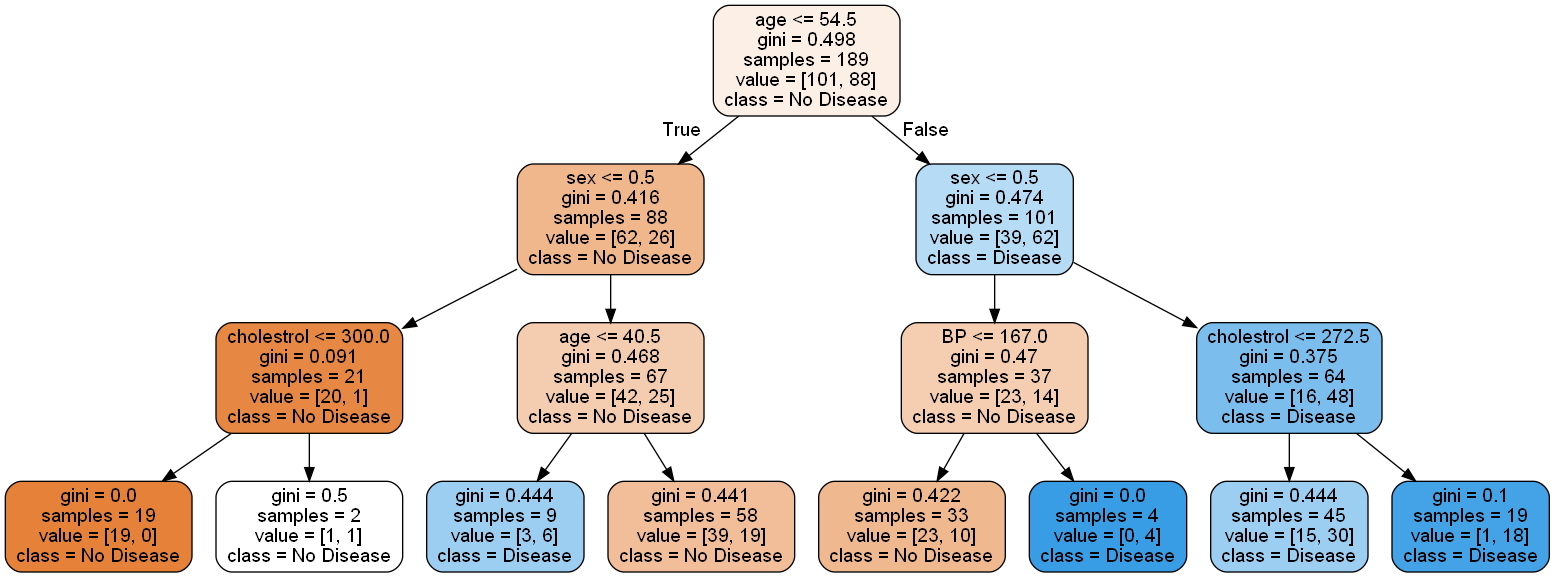

In [154]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
               class_names= ["No Disease", "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Evaluation of model

In [155]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [157]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [158]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)

## Create funtion to print graph and evaluate model for decisionTreeClassifier

In [159]:
def create_tree(dt_classifier):
    dot_data = StringIO()

    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                    feature_names=X.columns, 
                   class_names= ["No Disease", "Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [160]:
def evaluate_model(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    print("Train Performance")
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print("-"*50)
    print("Test Performance")
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

In [161]:
evaluate_model(dt)

Train Performance
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test Performance
0.6049382716049383
[[35 14]
 [18 14]]


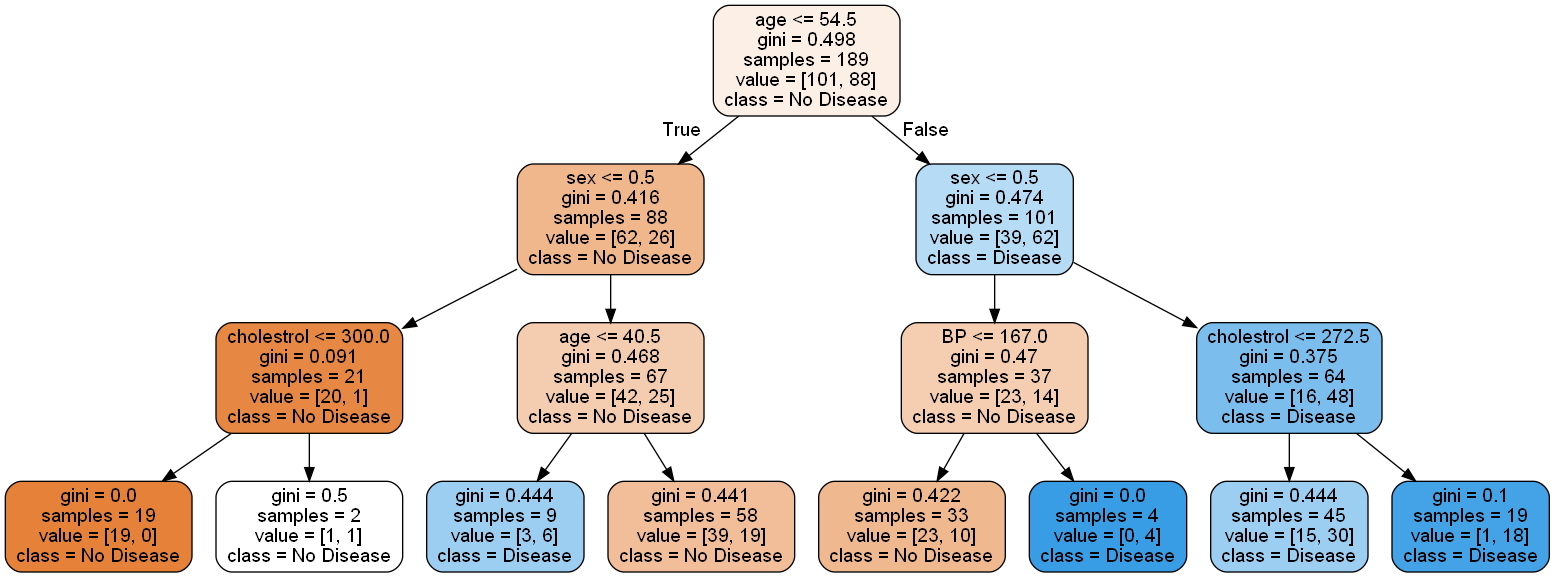

In [162]:
grph = create_tree(dt)
Image(grph.create_png())

## Decision tree witghout any hyperparameters

In [163]:
dt_default = DecisionTreeClassifier()

dt_default.fit(X_train, y_train)

DecisionTreeClassifier()

In [164]:
evaluate_model(dt_default)

Train Performance
1.0
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Performance
0.654320987654321
[[33 16]
 [12 20]]


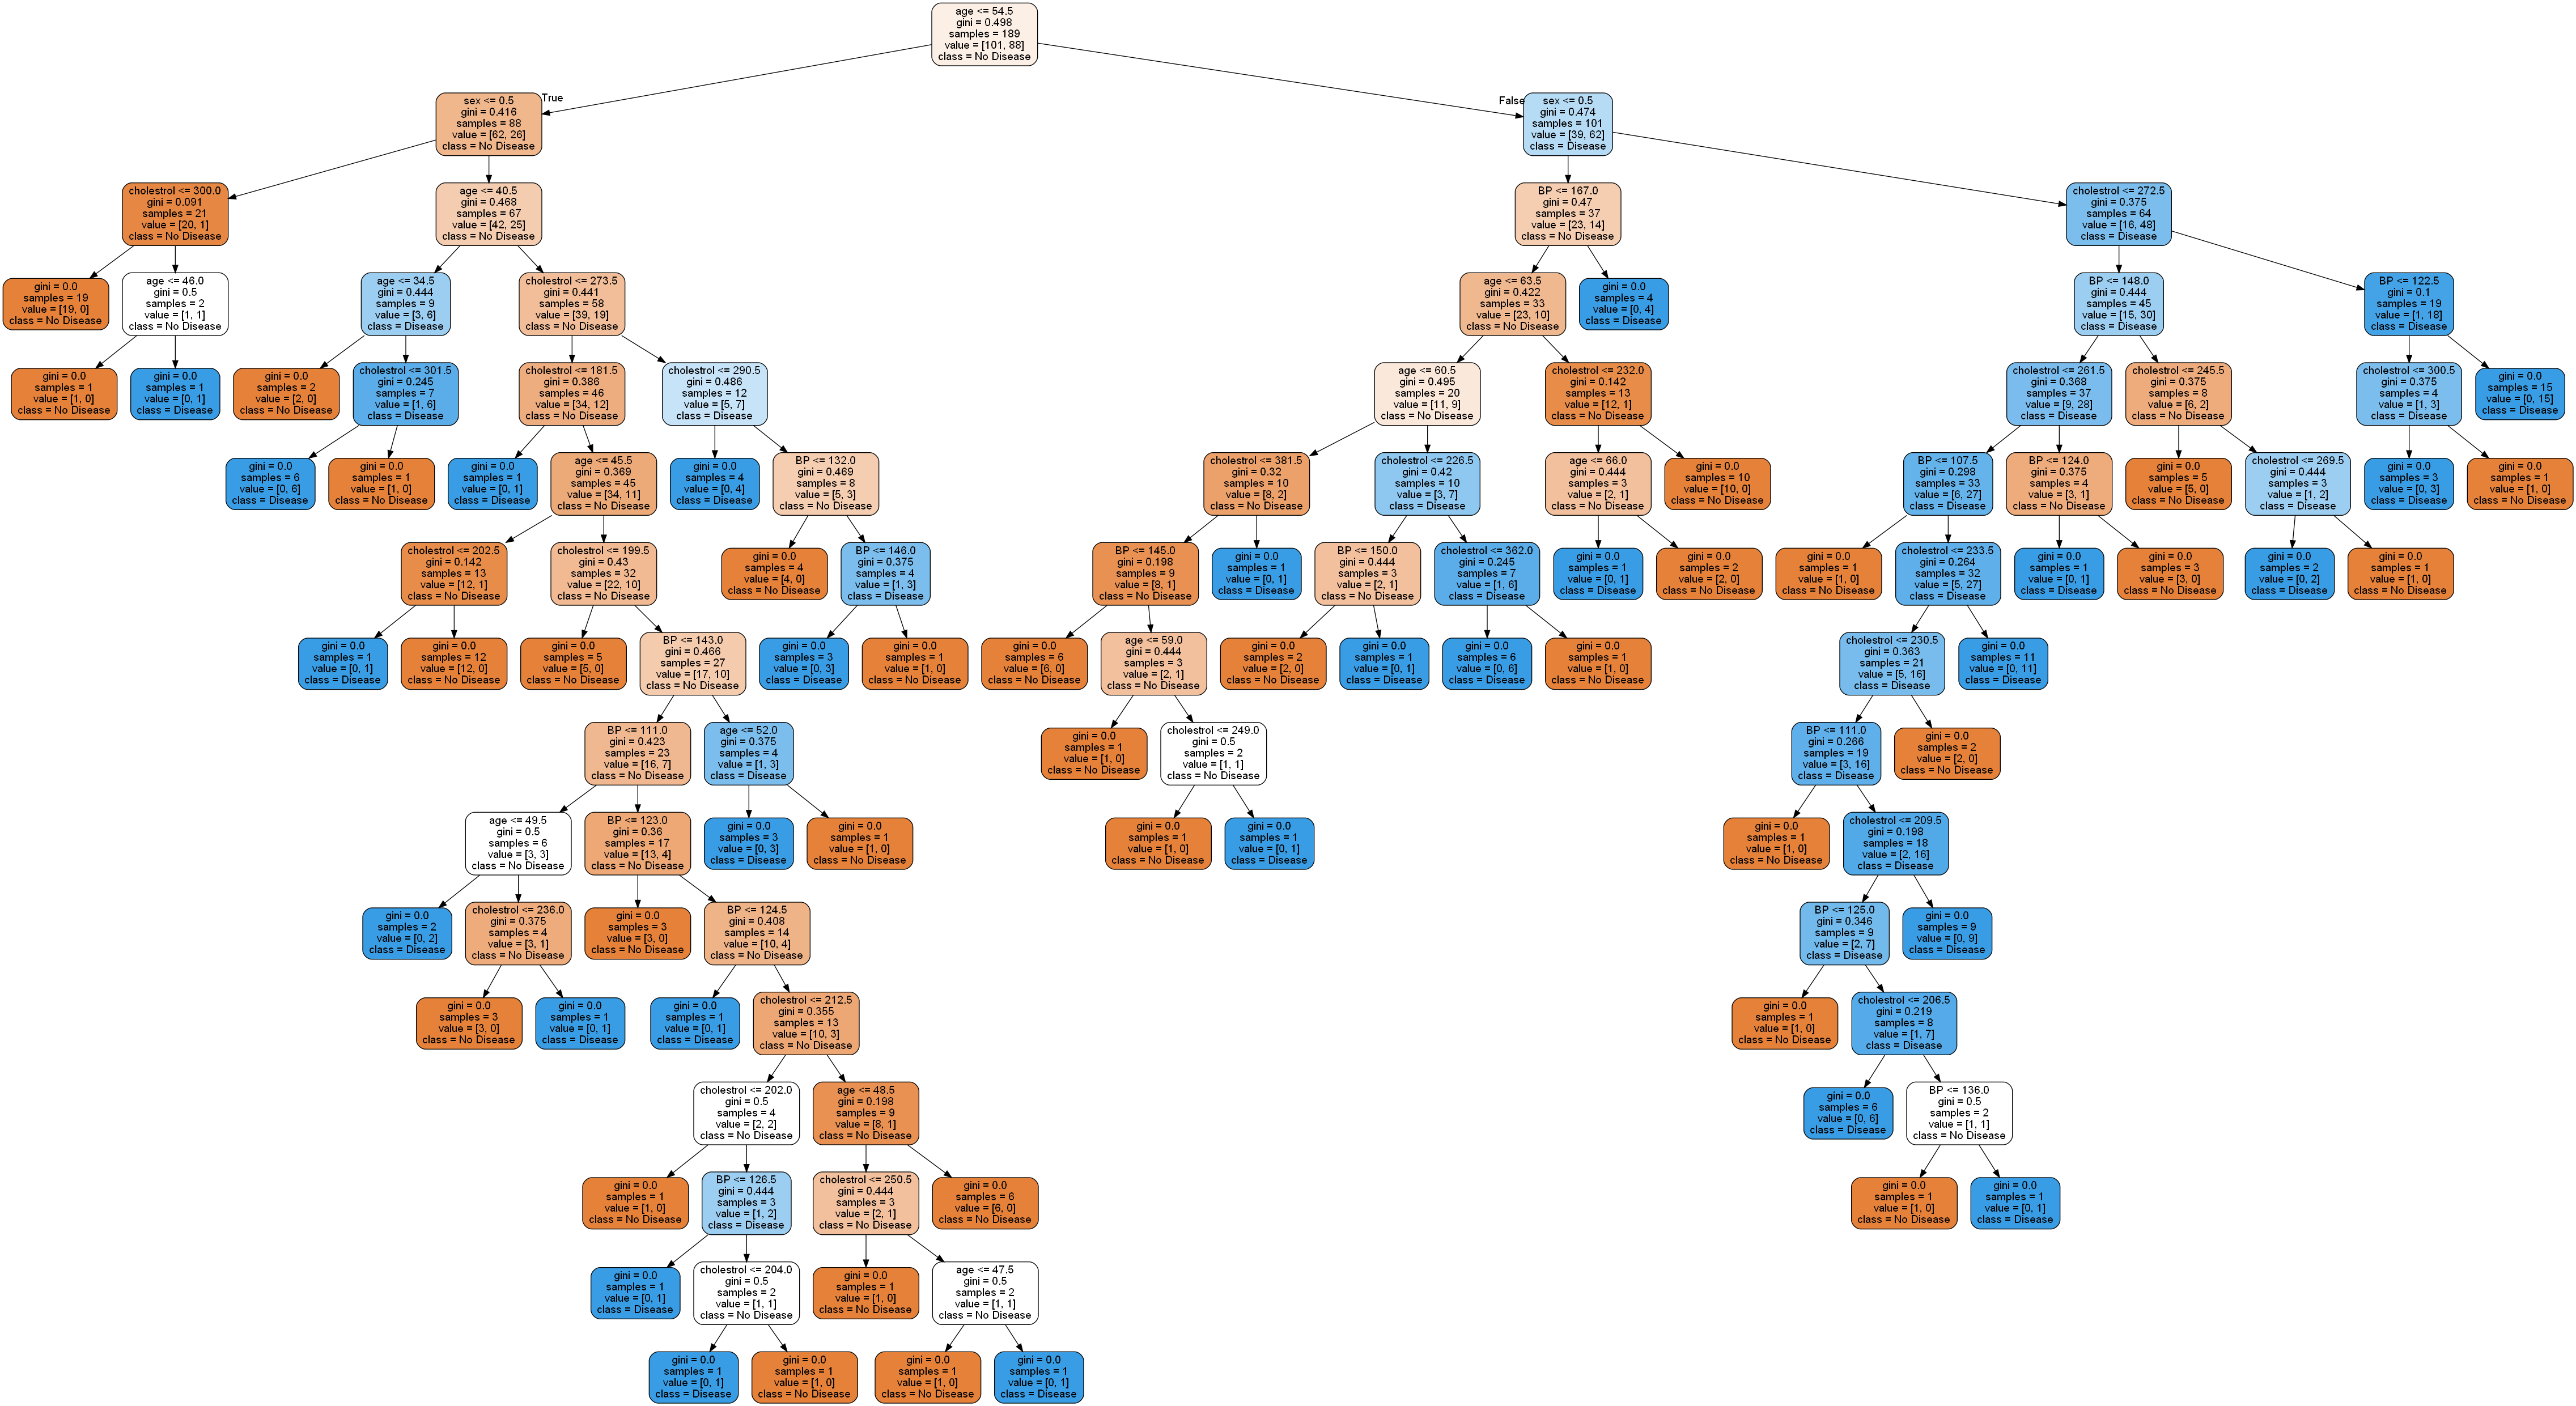

In [165]:
grph = create_tree(dt_default)
Image(grph.create_png())

## Specifying the minimum sample split

In [166]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20, random_state=42)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

In [167]:
evaluate_model(dt_min_split)

Train Performance
0.8359788359788359
[[85 16]
 [15 73]]
--------------------------------------------------
Test Performance
0.6419753086419753
[[32 17]
 [12 20]]


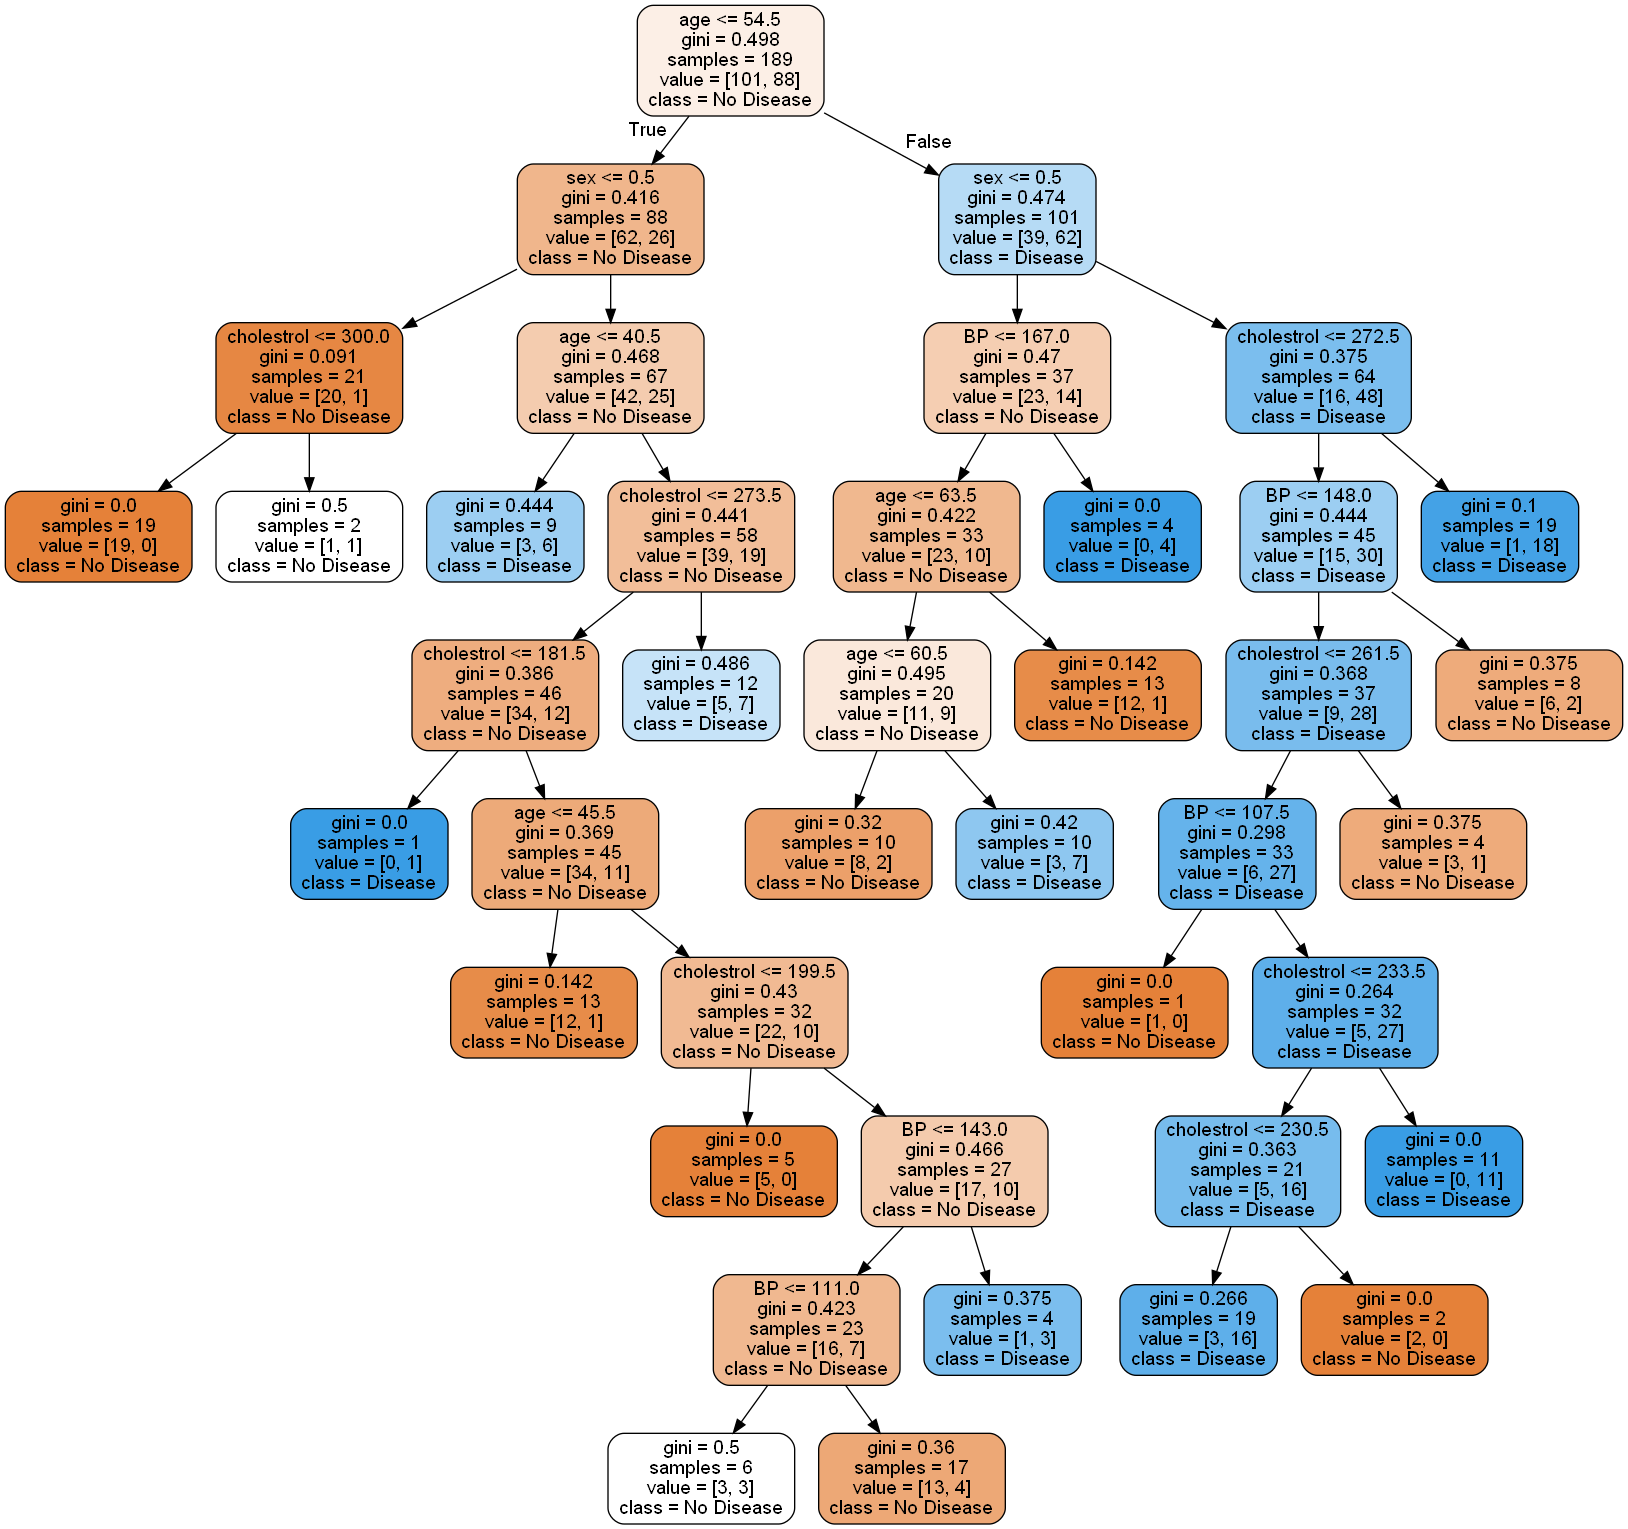

In [168]:
grph = create_tree(dt_min_split)
Image(grph.create_png())

## Specifying the minimum sample leaf

In [169]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

In [170]:
evaluate_model(dt_min_leaf)

Train Performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test Performance
0.6419753086419753
[[38 11]
 [18 14]]


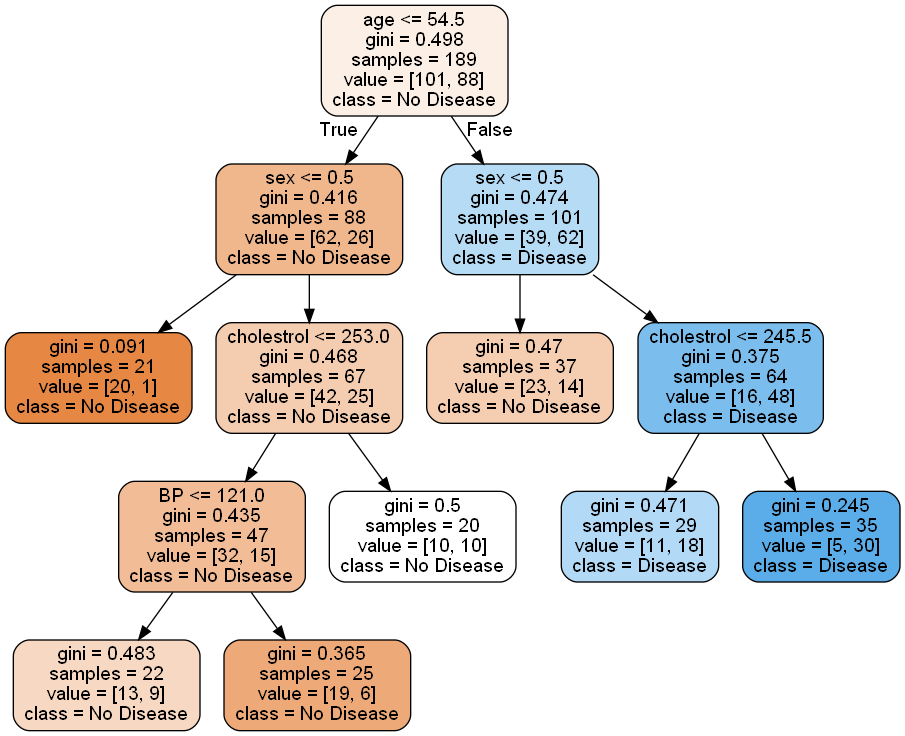

In [171]:
grph = create_tree(dt_min_leaf)
Image(grph.create_png())

## Using entropy instead of gini

In [172]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

In [173]:
evaluate_model(dt_min_leaf_entropy)

Train Performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test Performance
0.6419753086419753
[[38 11]
 [18 14]]


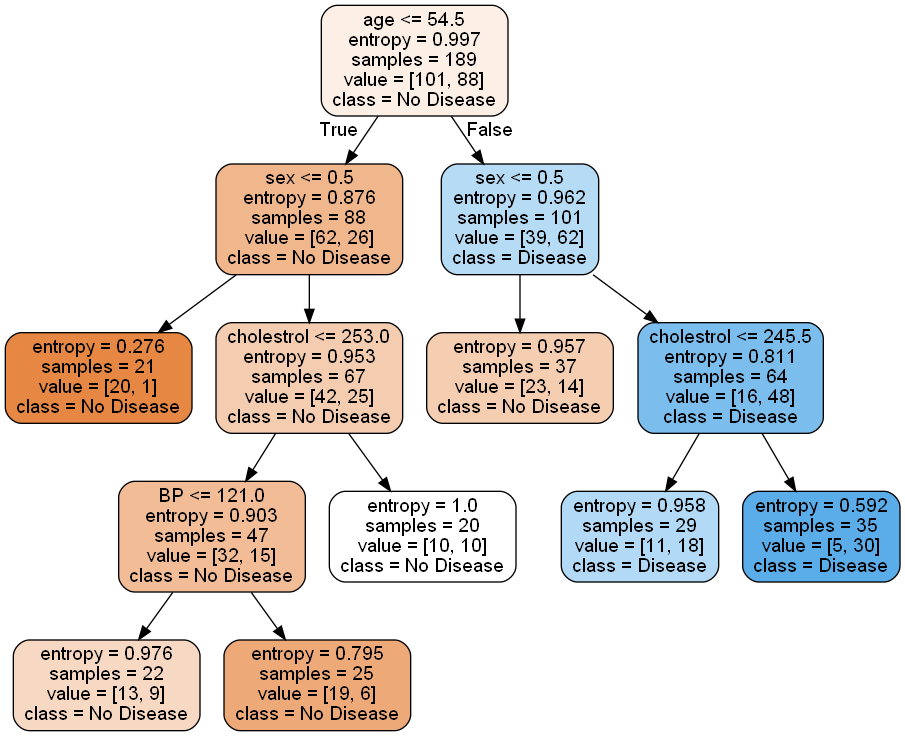

In [174]:
grph = create_tree(dt_min_leaf_entropy)
Image(grph.create_png())

## Hyper Paramater Tuning Using GridSearchCV

In [175]:
fold = model_selection.KFold(n_splits=4, shuffle=True)

In [176]:
params ={
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100],
    "max_leaf_nodes" :[5,10,20,50,100],
    "criterion" : ["gini", "entropy"]
}

In [177]:
dt =DecisionTreeClassifier(random_state=42)

In [178]:
grid_search = model_selection.GridSearchCV(estimator=dt,
                            param_grid=params,
                            cv=fold,
                            n_jobs=-1, verbose=1,
                            scoring="accuracy",
                            return_train_score=True)

In [179]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 250 candidates, totalling 1000 fits
Wall time: 6.78 s


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'max_leaf_nodes': [5, 10, 20, 50, 100],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [180]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.006482,4.988313e-04,0.003989,5.930587e-07,gini,2,5,5,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.625000,...,0.617021,0.677527,0.067946,31,0.716312,0.676056,0.711268,0.725352,0.707247,0.018702
1,0.011469,8.934333e-03,0.005985,3.456039e-03,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.625000,...,0.638298,0.682846,0.063702,1,0.716312,0.676056,0.711268,0.711268,0.703726,0.016107
2,0.006731,4.317426e-04,0.003241,4.319146e-04,gini,2,5,20,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.625000,...,0.638298,0.682846,0.063702,1,0.716312,0.676056,0.711268,0.711268,0.703726,0.016107
3,0.005486,4.991295e-04,0.004238,1.086255e-03,gini,2,5,50,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.583333,...,0.553191,0.635195,0.069425,133,0.666667,0.633803,0.647887,0.676056,0.656103,0.016390
4,0.004986,4.578320e-07,0.003490,4.988318e-04,gini,2,5,100,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.520833,...,0.574468,0.534464,0.044138,201,0.539007,0.521127,0.556338,0.521127,0.534400,0.014619


In [181]:
cv_results.shape

(250, 22)

In [182]:
cv_results.nlargest(5, "mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
1,0.011469,0.008934,0.005985,3.456039e-03,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.625,...,0.638298,0.682846,0.063702,1,0.716312,0.676056,0.711268,0.711268,0.703726,0.016107
2,0.006731,0.000432,0.003241,4.319146e-04,gini,2,5,20,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.625,...,0.638298,0.682846,0.063702,1,0.716312,0.676056,0.711268,0.711268,0.703726,0.016107
6,0.004489,0.000499,0.003491,4.988313e-04,gini,2,10,10,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.625,...,0.638298,0.682846,0.063702,1,0.716312,0.676056,0.711268,0.711268,0.703726,0.016107
7,0.004737,0.000432,0.002992,3.097148e-07,gini,2,10,20,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.625,...,0.638298,0.682846,0.063702,1,0.716312,0.676056,0.711268,0.711268,0.703726,0.016107
11,0.003490,0.000498,0.001994,2.665601e-07,gini,2,20,10,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.625,...,0.638298,0.682846,0.063702,1,0.716312,0.676056,0.711268,0.711268,0.703726,0.016107


In [183]:
grid_search.best_score_

0.6828457446808511

In [184]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5, min_samples_leaf=10,
                       random_state=42)

In [185]:
dt_best = grid_search.best_estimator_

In [186]:
evaluate_model(dt_best)

Train Performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test Performance
0.6419753086419753
[[38 11]
 [18 14]]


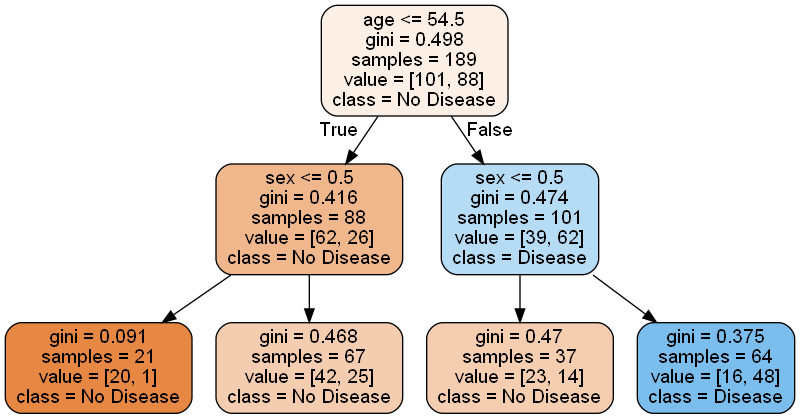

In [187]:
grph = create_tree(dt_best)
Image(grph.create_png())

## Using Random forestClassifier

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
X_train.head()

,age,sex,BP,cholestrol
84,57,1,110,201
251,44,1,130,219
92,54,1,124,266
201,58,1,125,300
126,62,1,120,267


In [193]:
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10)

In [194]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [195]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1914837113)]

In [196]:
sample_tree = rf.estimators_[3]

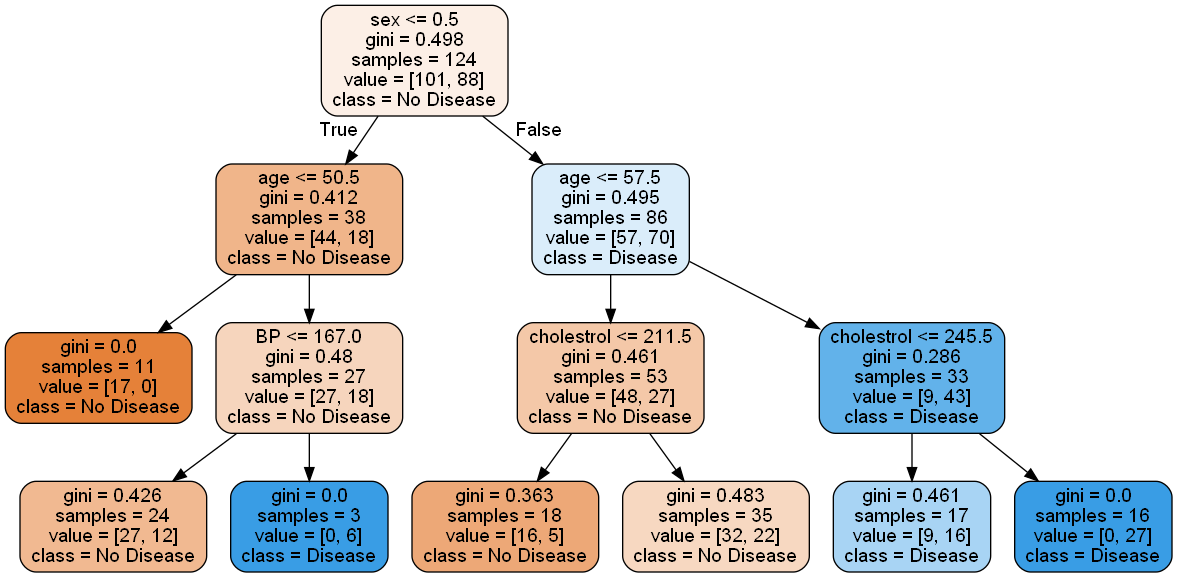

In [198]:
grph = create_tree(sample_tree)
Image(grph.create_png())

In [199]:
sample_tree = rf.estimators_[4]

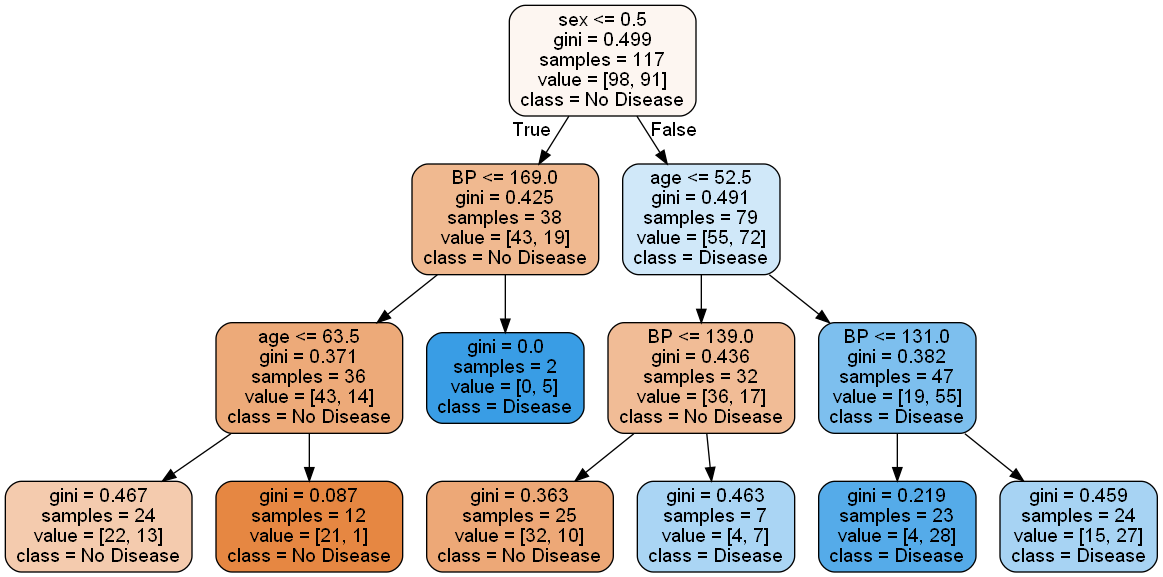

In [200]:
grph = create_tree(sample_tree)
Image(grph.create_png())

## OOB Score

In [201]:
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, oob_score=True)

In [202]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [203]:
rf.oob_score_

0.6349206349206349

## Hyperparameter tuning using grid search

In [204]:
random_frst = RandomForestClassifier(random_state=42, n_jobs=-1)

In [205]:
params = {
    "max_depth": [1,2,5,10,20],
    "min_samples_leaf": [5,10,20,50,100],
    "max_features" : [2,3,4],
    "n_estimators" : [10,30,50,100,200]
}

In [207]:
grid_search = GridSearchCV(estimator=random_frst, param_grid=params, 
                          cv=4, verbose=1, n_jobs=-1, scoring="accuracy")


In [208]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
Wall time: 55.4 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [209]:
rf_best = grid_search.best_estimator_

In [210]:
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [211]:
evaluate_model(rf_best)

Train Performance
0.8042328042328042
[[87 14]
 [23 65]]
--------------------------------------------------
Test Performance
0.8024691358024691
[[42  7]
 [ 9 23]]


In [212]:
sample_tree = rf_best.estimators_[0]

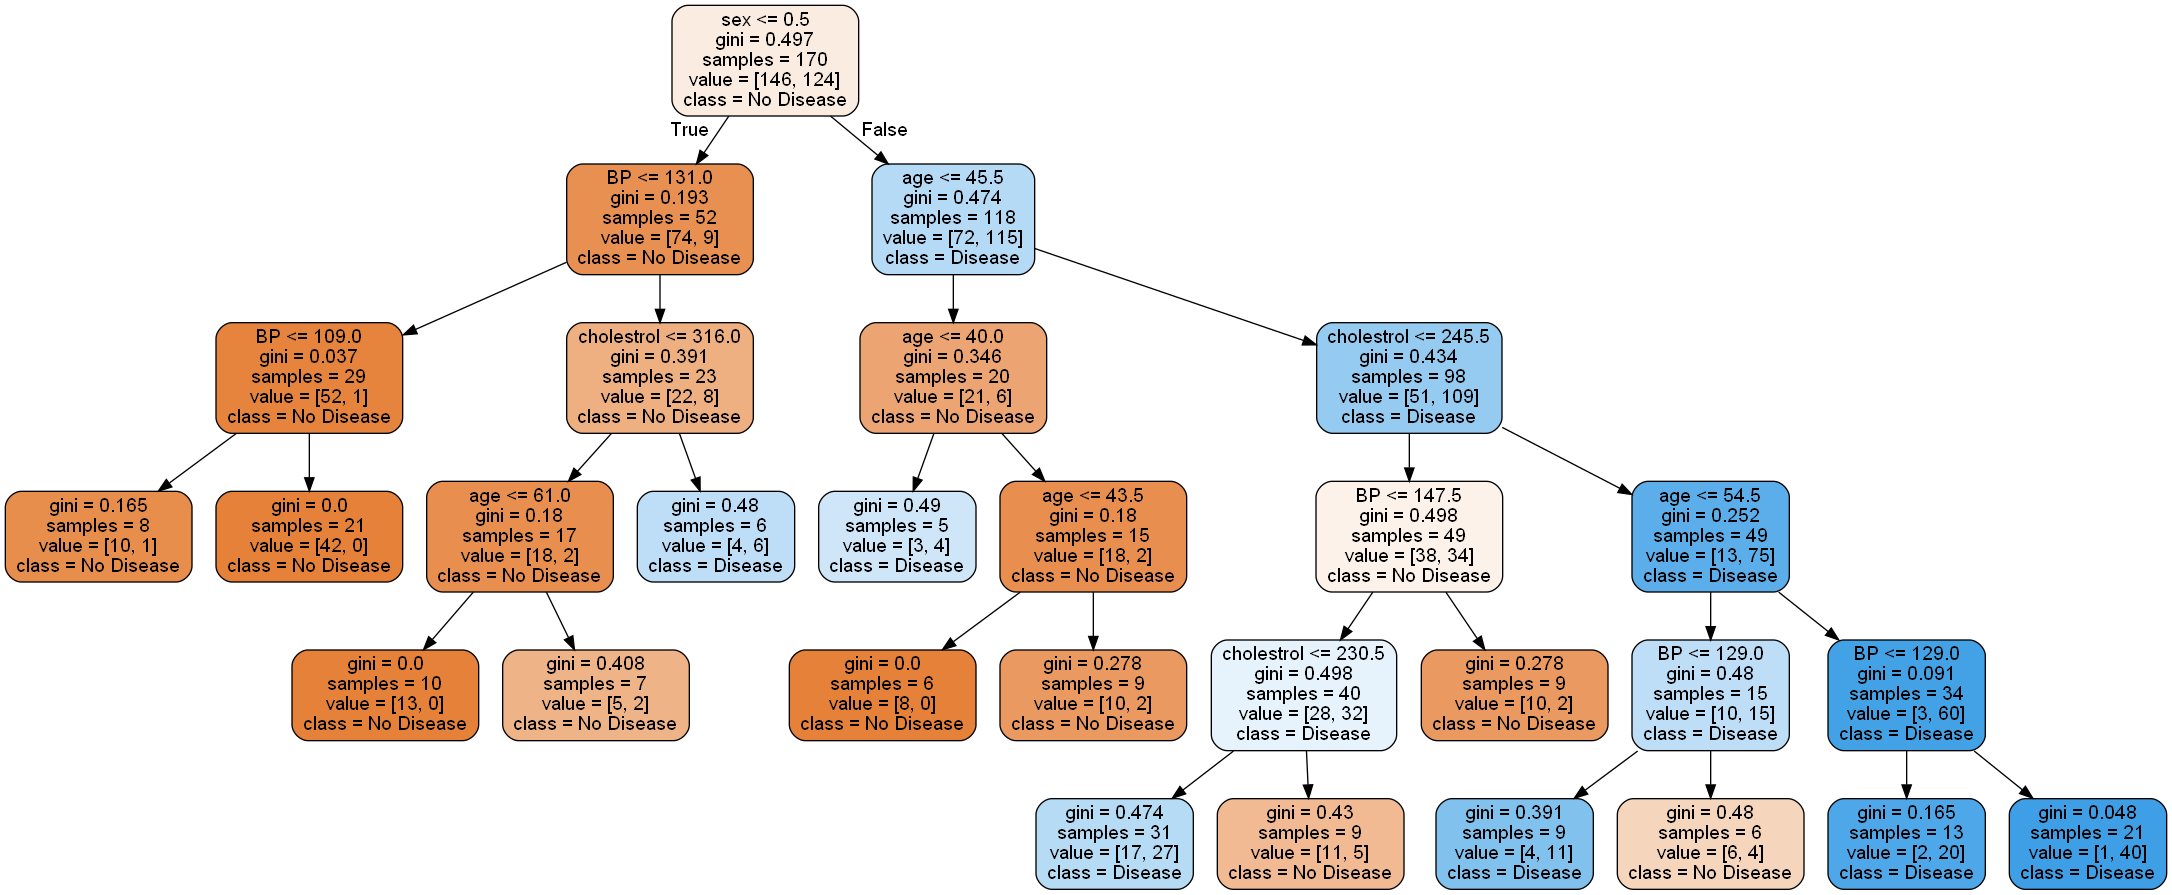

In [213]:
gp =create_tree(sample_tree)
Image(gp.create_png())

## Variable Importance in RandomForest and DecisionTree

In [214]:
new_rf = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=-1,max_depth=5,oob_score=True)

In [215]:
new_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [216]:
new_rf.feature_importances_

array([0.37539743, 0.13780788, 0.20834585, 0.27844883])

In [217]:
df = pd.DataFrame({
    "Variable": X_train.columns,
    "Importance" : new_rf.feature_importances_
})

In [220]:
df.sort_values(by = "Importance", ascending=False)

,Variable,Importance
0,age,0.375397
3,cholestrol,0.278449
2,BP,0.208346
1,sex,0.137808
